# INFO 4900 — Week Two

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import re

## Preparing Data

In [2]:
# Load data
polls = gpd.read_feather("data/polling_station_coords.feather")
districts = gpd.read_file("data/Uganda_Districts-2020---136-wgs84.zip")
names = pd.read_feather("data/names_with_kingdoms.feather")

## Sanitizing Text: polling_station_coords.feather

In [3]:
# Stripping whitespace
polls['PS_name'] = polls['PS_name'].str.strip()

In [4]:
# Lowering case
polls['PS_name'] = polls['PS_name'].str.lower()

In [5]:
# Removing special characters
polls['PS_name'] = polls['PS_name'].str.replace('[^\w\s]', '', True)

/var/folders/33/qp5k0v8128136rvjkr63g0x00000gn/T/ipykernel_32815/2074057513.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  polls['PS_name'] = polls['PS_name'].str.replace('[^\w\s]', '', True)


In [6]:
# Second look at dataframe
polls.head()

,PS_name,PS_code,VoteReg_district_name,VoteReg_district_code,VoteReg_county_name,VoteReg_county_code,VoteReg_subcounty_name,VoteReg_subcounty_code,VoteReg_parish_code,VoteReg_parish_name,...,FDC_Registered,Turnout,REG_VOTERS,YOWERI_KAGUTA_MUSEVENI,KIZZA_BESIGYE_KIFEFE,VALID_VOTES,village_mean_distance,villages,lat_lon,points
0,adyeda centre,1,APAC,1,KWANIA COUNTY,2,ADUKU,1,1,ADYEDA,...,0.115523,0.671480,277.0,144.0,32.0,182.0,2285.087273,ADYEDA IMALO;ANYWAL;ATAKARA;,"[2.065772095790027, 32.715481326735095]",POINT (32.71548 2.06577)
1,aporwegi ps,2,APAC,1,KWANIA COUNTY,2,ADUKU,1,1,ADYEDA,...,0.146724,0.646724,702.0,283.0,103.0,430.0,1127.896277,ADYEDA IMALO;ANYWAL;APORWEGI AATAKARA,"[2.058047456592412, 32.72281709757338]",POINT (32.72282 2.05805)
2,adyeda imalo,3,APAC,1,KWANIA COUNTY,2,ADUKU,1,1,ADYEDA,...,0.137072,0.753894,321.0,190.0,44.0,238.0,1921.654206,ADYEDA IMALO;ANYWAL,"[2.065772095790027, 32.715481326735095]",POINT (32.71548 2.06577)
3,alira b,1,APAC,1,KWANIA COUNTY,2,ADUKU,1,2,ALIRA,...,0.266055,0.694954,872.0,328.0,232.0,584.0,1695.521839,AKOT A;AKOT B;AKWODONG B;AKWOYO;ALIRA A;ALIRA ...,"[2.0821059545915097, 32.761479779076204]",POINT (32.76148 2.08211)
4,akot a,2,APAC,1,KWANIA COUNTY,2,ADUKU,1,2,ALIRA,...,0.344000,0.682667,750.0,218.0,258.0,504.0,1653.587131,AKOT A;AKOT B;AKWODONG A;AKWODONG B;AKWOYO;ALI...,"[2.042473960840479, 32.742188123783855]",POINT (32.74219 2.04247)


## Sanitizing Text: names_with_kingdoms.feather

In [7]:
# Stripping whitespace
names['polling_station'] = names['polling_station'].str.strip()

In [8]:
# Lowering case
names['polling_station'] = names['polling_station'].str.lower()

In [9]:
# Removing special characters
names['polling_station'] = names['polling_station'].str.replace('[^\w\s]', '', True)

/var/folders/33/qp5k0v8128136rvjkr63g0x00000gn/T/ipykernel_32815/820029302.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  names['polling_station'] = names['polling_station'].str.replace('[^\w\s]', '', True)


In [10]:
# Second look at dataframe
names.head()

,Unnamed: 0,appid_receipt_num,constituency,constituency_num,date_of_birth,district,district_num,other_name,parish,parish_num,polling_station,polling_station_num,sex,sub_county,sub_county_num,surname,village,voter_num,d_names,region
0,0,1206420000MP6/CF8407,KWANIA COUNTY,2,26-12-1984,Apac,1,CHRISTINE,ADYEDA,1,adyeda centre,1,F,ADUKU,1,ABANG,ANYWAL,61281069,Apac,Lango
1,1,0906720000RKU/CF4900,KWANIA COUNTY,2,10-05-1949,Apac,1,BITU,ADYEDA,1,adyeda centre,1,F,ADUKU,1,ABEJA,ATAKARA,58687089,Apac,Lango
2,2,1025320003CZW/CM910,KWANIA COUNTY,2,07-07-1991,Apac,1,JACOB,ADYEDA,1,adyeda centre,1,M,ADUKU,1,ABILI,ADYEDA IMALO,55386251,Apac,Lango
3,3,1328720001XLP/CF8200,KWANIA COUNTY,2,16-03-1982,Apac,1,JENIFFER,ADYEDA,1,adyeda centre,1,F,ADUKU,1,ABUNI,ANYWAL,64284712,Apac,Lango
4,4,0906720000UV6/CF7500,KWANIA COUNTY,2,05-05-1975,Apac,1,EVALINE,ADYEDA,1,adyeda centre,1,F,ADUKU,1,ABWOLI,ATAKARA,63056778,Apac,Lango


## Salient Questions/Comments

1. Although both datasets were collected in 2016, their polling station, county, parish, and village counts seem to differ considerably. I plan to discuss how to reconcile these differences during the next meeting. 
2. I don't have the column descriptions and thusly do not quite understand how an administrative level code/number (ex. names['constituency_num']) differs from an administrative level itself. For example, while some administrative levels like districts have the same number of unique names as codes/numbers, most others do not have a one-to-one alignment.
3. Districts appear to be the most granular level of administration that both datasets agree on the number of. I'm a bit confused about why the datasets disagree on the number of counties—are there some counties that lack registered voters (and would therefore not be an index/row in the registration dataset)?

## Maps of Polling Station Data

In [11]:
# Explore district data format
districts.head()

,dname2019,d,total2020,ttotal2020,2010,2016,2017,2018,2020,geometry
0,MASAKA,Masaka,"335,700",335700.0,MASAKA,MASAKA,MASAKA,MASAKA,MASAKA,"POLYGON ((32.00051 -0.60761, 32.00053 -0.60993..."
1,BUTEBO,Butebo,"121,200",121200.0,PALLISA,BUTEBO,BUTEBO,BUTEBO,BUTEBO,"POLYGON ((33.87314 1.22742, 33.87306 1.22897, ..."
2,ALEBTONG,Alebtong,"266,100",266100.0,ALEBTONG,ALEBTONG,ALEBTONG,ALEBTONG,ALEBTONG,"POLYGON ((33.44290 2.36391, 33.44264 2.36336, ..."
3,TORORO,Tororo,"597,500",597500.0,TORORO,TORORO,TORORO,TORORO,TORORO,"POLYGON ((33.97873 0.57800, 33.97864 0.57808, ..."
4,MOROTO,Moroto,"118,500",118500.0,MOROTO,MOROTO,MOROTO,MOROTO,MOROTO,"POLYGON ((34.83133 2.16438, 34.83133 2.16438, ..."


<AxesSubplot:>

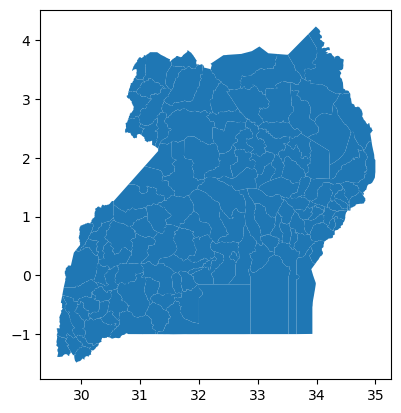

In [12]:
# Create a sample map
districts.plot()

In [13]:
# Spatially join polling and district datasets
joined_df = gpd.sjoin(districts, polls, how = "left", op = "intersects")

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
/var/folders/33/qp5k0v8128136rvjkr63g0x00000gn/T/ipykernel_32815/1028104108.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  joined_df = gpd.sjoin(districts, polls, how = "left", op = "intersects")


In [14]:
# Explore joined data values
joined_df.head()

,dname2019,d,total2020,ttotal2020,2010,2016,2017,2018,2020,geometry,...,NRM_Registered,FDC_Registered,Turnout,REG_VOTERS,YOWERI_KAGUTA_MUSEVENI,KIZZA_BESIGYE_KIFEFE,VALID_VOTES,village_mean_distance,villages,lat_lon
0,MASAKA,Masaka,"335,700",335700.0,MASAKA,MASAKA,MASAKA,MASAKA,MASAKA,"POLYGON ((32.00051 -0.60761, 32.00053 -0.60993...",...,0.259084,0.396524,0.733017,633.0,164.0,251.0,452.0,784.993681,KALAGALA;LWABIKERE;MULEMA,"[-0.28158847509456986, 31.77385129072259]"
0,MASAKA,Masaka,"335,700",335700.0,MASAKA,MASAKA,MASAKA,MASAKA,MASAKA,"POLYGON ((32.00051 -0.60761, 32.00053 -0.60993...",...,0.213693,0.441909,0.695021,482.0,103.0,213.0,333.0,209.000000,KAYUNGA,"[-0.2785289074682445, 31.74929731060801]"
0,MASAKA,Masaka,"335,700",335700.0,MASAKA,MASAKA,MASAKA,MASAKA,MASAKA,"POLYGON ((32.00051 -0.60761, 32.00053 -0.60993...",...,0.371795,0.311355,0.745421,546.0,203.0,170.0,386.0,413.977099,BUGABIRAKIYIMBWEKYALUGO;NDEGEYA,"[-0.27458103041014326, 31.726929432861564]"
0,MASAKA,Masaka,"335,700",335700.0,MASAKA,MASAKA,MASAKA,MASAKA,MASAKA,"POLYGON ((32.00051 -0.60761, 32.00053 -0.60993...",...,0.334821,0.252232,0.649554,448.0,150.0,113.0,276.0,3515.906250,KAKO HILL;KAKO VILLAGE;NAMAKINDU,"[-0.27043467917998293, 31.81306674535471]"
0,MASAKA,Masaka,"335,700",335700.0,MASAKA,MASAKA,MASAKA,MASAKA,MASAKA,"POLYGON ((32.00051 -0.60761, 32.00053 -0.60993...",...,0.331723,0.347826,0.698873,621.0,206.0,216.0,432.0,2694.376812,KINYERERE;LWANDA;NAKATOOKE,"[-0.2701900045230249, 31.7965600827924]"


In [15]:
# Group by district name and count polling stations
poll_count = joined_df.groupby("2016")["2016"].count()
poll_count.name = "poll_count"
districts = pd.merge(left = districts, right = poll_count, left_on = "2016", right_index = True)

0        Annotation(31.8556, -0.491258, 'MASAKA')
1          Annotation(33.9843, 1.18223, 'BUTEBO')
2        Annotation(33.2557, 2.26668, 'ALEBTONG')
3         Annotation(34.0822, 0.724974, 'TORORO')
4          Annotation(34.6316, 2.64869, 'MOROTO')
                          ...                    
124         Annotation(31.6614, -0.8062, 'RAKAI')
126       Annotation(31.3037, -0.707012, 'RAKAI')
125        Annotation(31.7027, 0.195672, 'GOMBA')
127    Annotation(30.1518, -0.483758, 'BUSHENYI')
128    Annotation(30.8777, -0.853239, 'ISINGIRO')
Length: 136, dtype: object

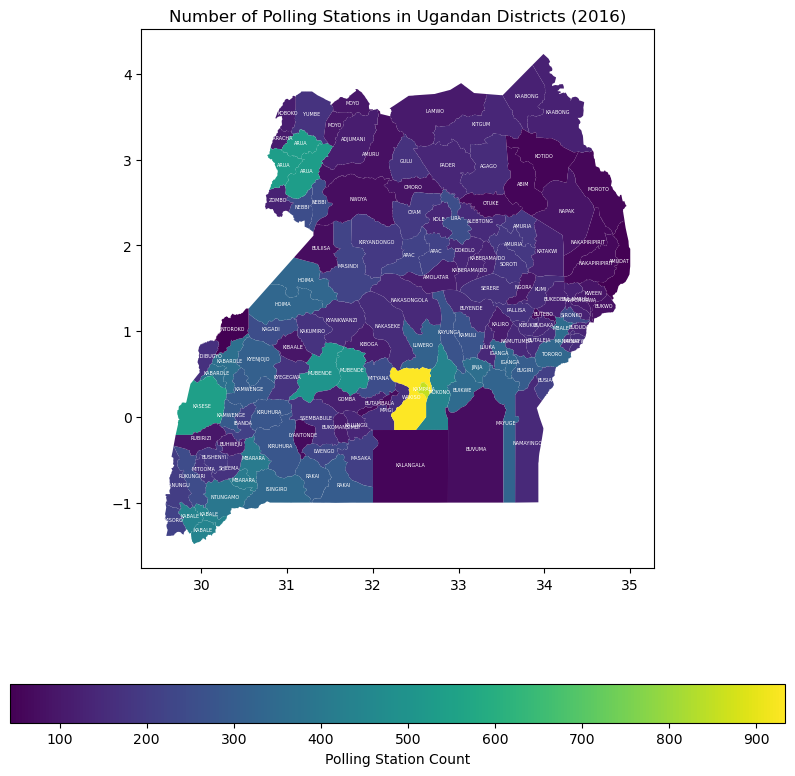

In [16]:
# Graph number of polling stations (labels)
ax = districts.plot(column = "poll_count",
                    cmap = "viridis",
                    legend = True,
                    legend_kwds={'label': "Polling Station Count",
                                'orientation': "horizontal"},
                    figsize = (10,10))
ax.set_title('Number of Polling Stations in Ugandan Districts (2016)')
districts.apply(lambda x: ax.annotate(text=x["2016"], xy = x.geometry.centroid.coords[0], ha = 'center', fontsize = 3.5, color = 'white'), axis = 1)

Text(0.5, 1.0, 'Number of Polling Stations in Ugandan Districts (2016)')

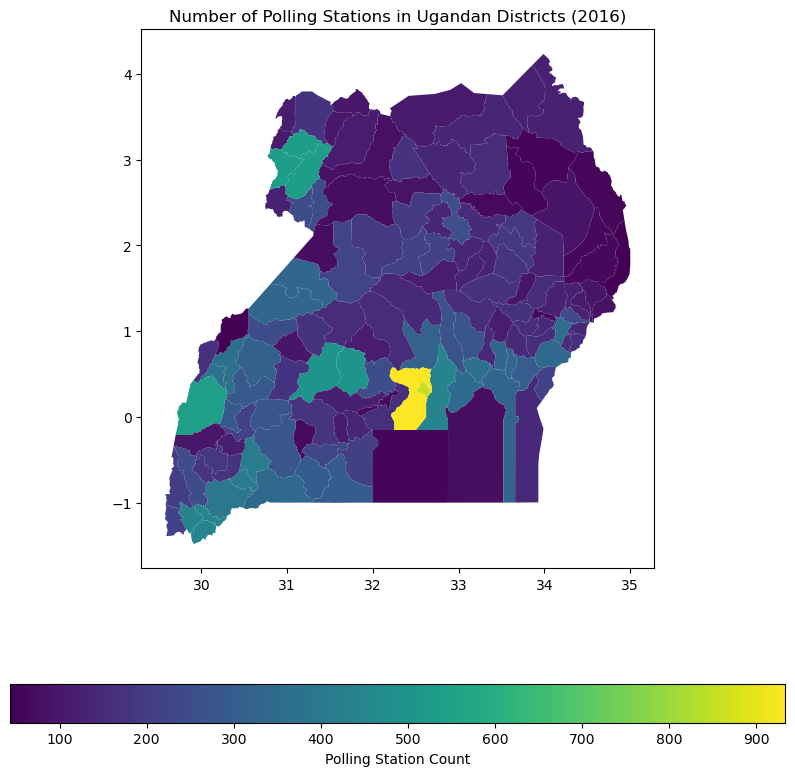

In [17]:
# Graph number of polling stations (no labels)
ax = districts.plot(column = "poll_count",
                    cmap = "viridis",
                    legend = True,
                    legend_kwds={'label': "Polling Station Count",
                                'orientation': "horizontal"},
                    figsize = (10,10))
ax.set_title('Number of Polling Stations in Ugandan Districts (2016)')

In [18]:
# Group by district name and count voters
voter_count = joined_df.groupby("2016")["REG_VOTERS"].sum()
voter_count.name = "voter_count"
districts = pd.merge(left = districts, right = voter_count, left_on = "2016", right_index = True)

0        Annotation(31.8556, -0.491258, 'MASAKA')
1          Annotation(33.9843, 1.18223, 'BUTEBO')
2        Annotation(33.2557, 2.26668, 'ALEBTONG')
3         Annotation(34.0822, 0.724974, 'TORORO')
4          Annotation(34.6316, 2.64869, 'MOROTO')
                          ...                    
124         Annotation(31.6614, -0.8062, 'RAKAI')
126       Annotation(31.3037, -0.707012, 'RAKAI')
125        Annotation(31.7027, 0.195672, 'GOMBA')
127    Annotation(30.1518, -0.483758, 'BUSHENYI')
128    Annotation(30.8777, -0.853239, 'ISINGIRO')
Length: 136, dtype: object

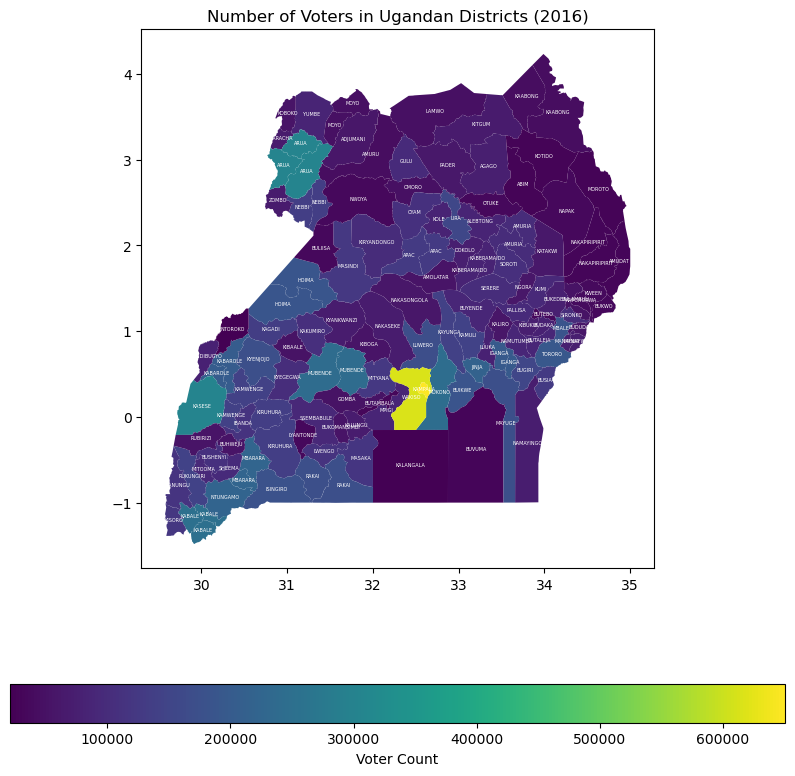

In [19]:
# Graph number of voters (labels)
ax = districts.plot(column = "voter_count",
                    cmap = "viridis",
                    legend = True,
                    legend_kwds={'label': "Voter Count",
                                'orientation': "horizontal"},
                    figsize = (10,10))
ax.set_title('Number of Voters in Ugandan Districts (2016)')
districts.apply(lambda x: ax.annotate(text=x["2016"], xy = x.geometry.centroid.coords[0], ha = 'center', fontsize = 3.5, color = 'white'), axis = 1)

Text(0.5, 1.0, 'Number of Voters in Ugandan Districts (2016)')

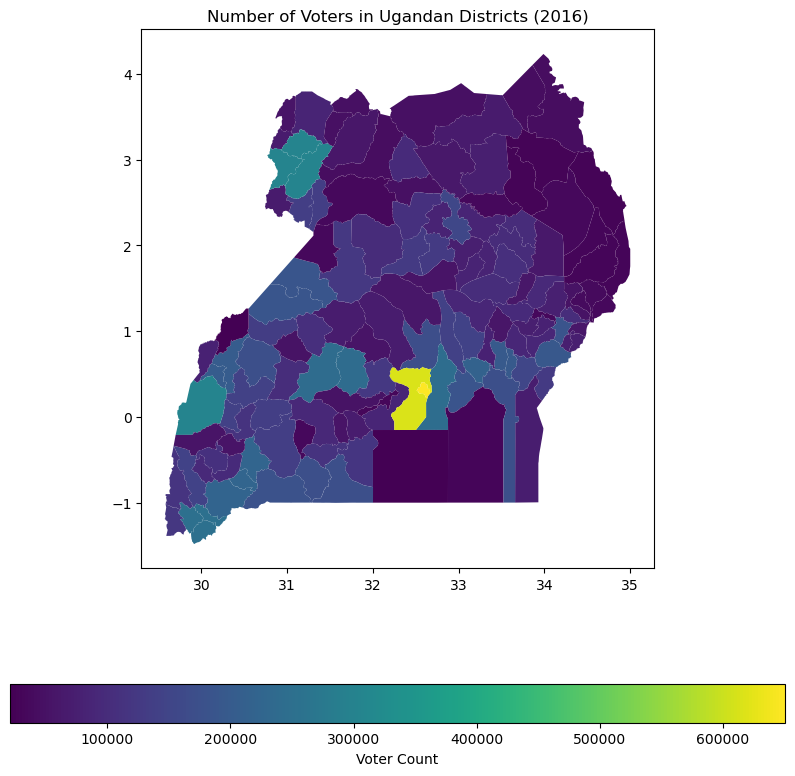

In [20]:
# Graph number of voters (no labels)
ax = districts.plot(column = "voter_count",
                    cmap = "viridis",
                    legend = True,
                    legend_kwds={'label': "Voter Count",
                                'orientation': "horizontal"},
                    figsize = (10,10))
ax.set_title('Number of Voters in Ugandan Districts (2016)')

In [21]:
# Group by district name and calculate voters per station
voter_ratio = voter_count/poll_count
voter_ratio.name = "voter_ratio"
districts = pd.merge(left = districts, right = voter_ratio, left_on = "2016", right_index = True)

0        Annotation(31.8556, -0.491258, 'MASAKA')
1          Annotation(33.9843, 1.18223, 'BUTEBO')
2        Annotation(33.2557, 2.26668, 'ALEBTONG')
3         Annotation(34.0822, 0.724974, 'TORORO')
4          Annotation(34.6316, 2.64869, 'MOROTO')
                          ...                    
124         Annotation(31.6614, -0.8062, 'RAKAI')
126       Annotation(31.3037, -0.707012, 'RAKAI')
125        Annotation(31.7027, 0.195672, 'GOMBA')
127    Annotation(30.1518, -0.483758, 'BUSHENYI')
128    Annotation(30.8777, -0.853239, 'ISINGIRO')
Length: 136, dtype: object

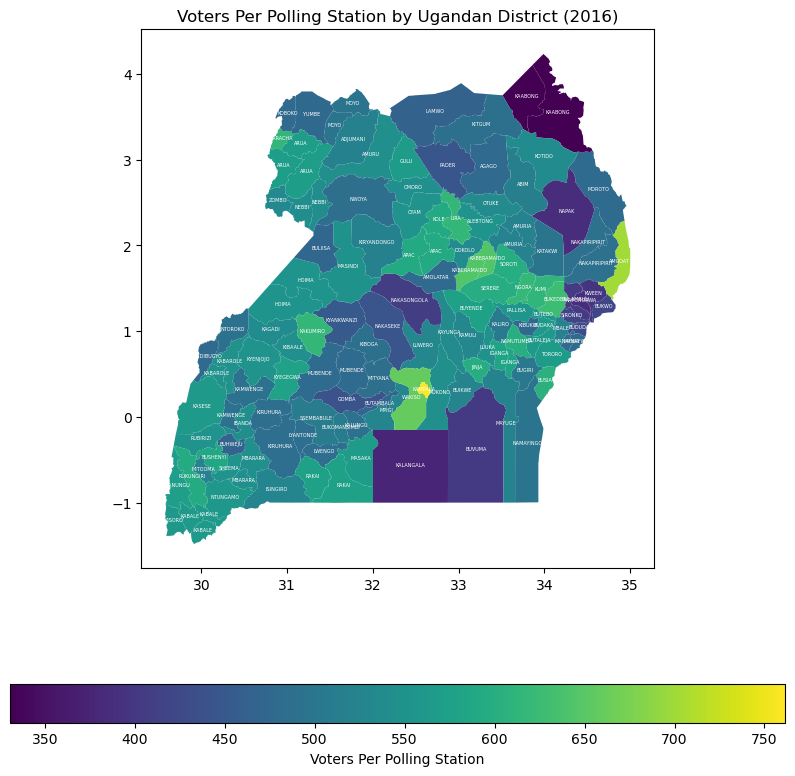

In [22]:
# Graph voter-to-station ratio (labels)
ax = districts.plot(column = "voter_ratio",
                    cmap = "viridis",
                    legend = True,
                    legend_kwds={'label': "Voters Per Polling Station",
                                'orientation': "horizontal"},
                    figsize = (10,10))
ax.set_title('Voters Per Polling Station by Ugandan District (2016)')
districts.apply(lambda x: ax.annotate(text=x["2016"], xy = x.geometry.centroid.coords[0], ha = 'center', fontsize = 3.5, color = 'white'), axis = 1)

Text(0.5, 1.0, 'Voters Per Polling Station by Ugandan District (2016)')

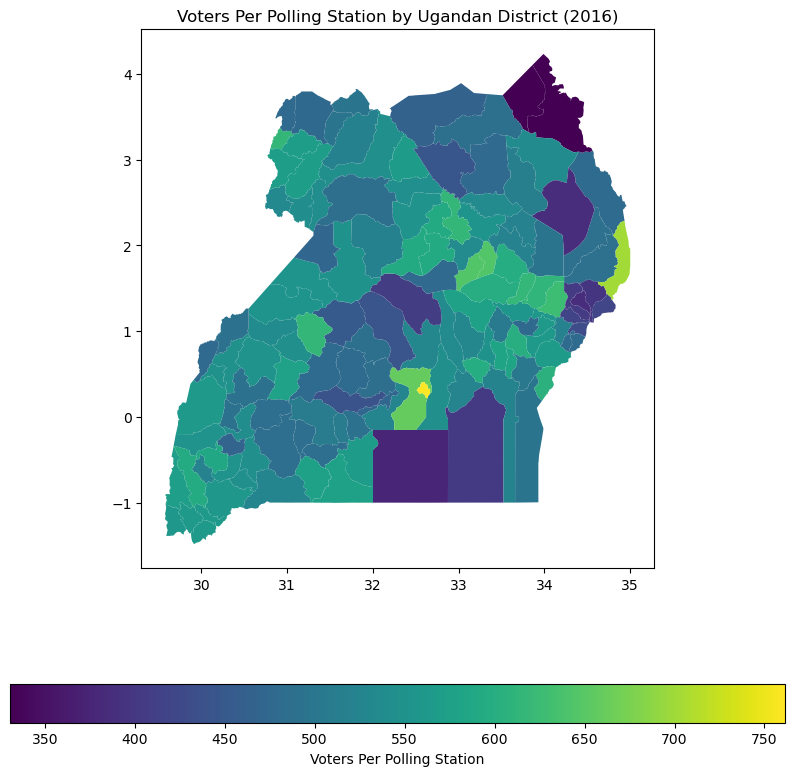

In [23]:
# Graph voter-to-station ratio (no labels)
ax = districts.plot(column = "voter_ratio",
                    cmap = "viridis",
                    legend = True,
                    legend_kwds={'label': "Voters Per Polling Station",
                                'orientation': "horizontal"},
                    figsize = (10,10))
ax.set_title('Voters Per Polling Station by Ugandan District (2016)')

## Preliminary Merge

In [24]:
# Merge polling station and voter dataframes
merged_df = pd.merge(polls, names, left_on = "PS_name", right_on = "polling_station", how = "outer", indicator = True)

In [25]:
# Quick look at merged data
print(merged_df)

                PS_name  PS_code VoteReg_district_name  VoteReg_district_code  \
0         adyeda centre      1.0                  APAC                    1.0   
1         adyeda centre      1.0                  APAC                    1.0   
2         adyeda centre      1.0                  APAC                    1.0   
3         adyeda centre      1.0                  APAC                    1.0   
4         adyeda centre      1.0                  APAC                    1.0   
...                 ...      ...                   ...                    ...   
15400869            NaN      NaN                   NaN                    NaN   
15400870            NaN      NaN                   NaN                    NaN   
15400871            NaN      NaN                   NaN                    NaN   
15400872            NaN      NaN                   NaN                    NaN   
15400873            NaN      NaN                   NaN                    NaN   

         VoteReg_county_nam

In [26]:
# Count of successfully and unsuccessfully merged rows
merged_df["_merge"].value_counts()

right_only    9124171
both          6259136
left_only       17567
Name: _merge, dtype: int64


In [46]:
# Find districts with the most stations in the polls dataset but not the names dataset
merged_df.query("_merge == 'left_only'").groupby(["_merge", "VoteReg_district_name"])["PS_name"].nunique().reset_index(name='num').sort_values(['num'], ascending=False)

,_merge,VoteReg_district_name,num
109,left_only,WAKISO,1270
42,left_only,KAMPALA,1196
50,left_only,KIBAALE,424
9,left_only,ARUA,405
47,left_only,KASESE,398
...,...,...,...
190,right_only,MITOOMA,0
191,right_only,MITYANA,0
192,right_only,MOROTO,0
193,right_only,MOYO,0


In [47]:
# Find districts with the most stations in the names dataset but not the polls dataset
merged_df.query("_merge == 'right_only'").groupby(["_merge", "d_names"])["polling_station"].nunique().reset_index(name='num').sort_values(['num'], ascending=False)

,_merge,d_names,num
221,right_only,Wakiso,443
162,right_only,Kibaale,321
121,right_only,Arua,311
159,right_only,Kasese,287
154,right_only,Kampala,267
...,...,...,...
79,left_only,Mityana,0
80,left_only,Moroto,0
81,left_only,Moyo,0
82,left_only,Mpigi,0


In [48]:
# Find districts with the most stations matched in both datasets
merged_df.query("_merge == 'both'").groupby(["_merge", "d_names"])["polling_station"].nunique().reset_index(name='num').sort_values(['num'], ascending=False)

,_merge,d_names,num
307,both,Mubende,379
261,both,Kabarole,259
260,both,Kabale,257
257,both,Isingiro,217
308,both,Mukono,213
...,...,...,...
110,left_only,Yumbe,0
109,left_only,Wakiso,0
108,left_only,Tororo,0
107,left_only,Ssembabule,0


In [49]:
# Find names of unsuccessfully matched stations from polls dataset, sorted by population
merged_df.query("_merge == 'left_only'").groupby(["_merge", "PS_name"]).size().reset_index(name='num').sort_values(['num'], ascending=False)

,_merge,PS_name,num
15859,left_only,st kizito p/s,10
6305,left_only,kasozi ps,7
6215,left_only,kashenyi ps,7
1750,left_only,bugembe health centre iv,6
6727,left_only,kayonza ps,6
...,...,...,...
28049,right_only,muhokya prschool (a-l,0
28048,right_only,muhito ps,0
28047,right_only,muhira ps,0
28046,right_only,muhindi ps,0


In [50]:
# Find names of unsuccessfully matched stations from names dataset, sorted by population
merged_df.query("_merge == 'right_only'").groupby(["_merge", "polling_station"]).size().reset_index(name='num').sort_values(['num'], ascending=False)

,_merge,polling_station,num
23901,right_only,st,194843
24009,right_only,te,25179
24409,right_only,zone,13176
19479,right_only,lc meeting place,11536
18277,right_only,kisaawe kikadde,9730
...,...,...,...
8138,left_only,mirambi t,0
8137,left_only,mirambi s,0
8136,left_only,mirambi primary school,0
8135,left_only,mirambi pr,0


In [51]:
# Find names of successfully matched stations, sorted by population
merged_df.query("_merge == 'both'").groupby(["_merge", "PS_name"]).size().reset_index(name='num').sort_values(['num'], ascending=False)

,_merge,PS_name,num
23887,both,kasambya,70128
23442,both,kalagala,49496
21374,both,bukasa,26260
24749,both,kinoni,22141
27686,both,new apostolic church,21128
...,...,...,...
9975,left_only,ziru muto,0
9974,left_only,zingoola,0
9973,left_only,zinga island,0
9972,left_only,zinga,0


## Mapping Mismatched Stations

Text(0.5, 1.0, 'Polling Station Matching')

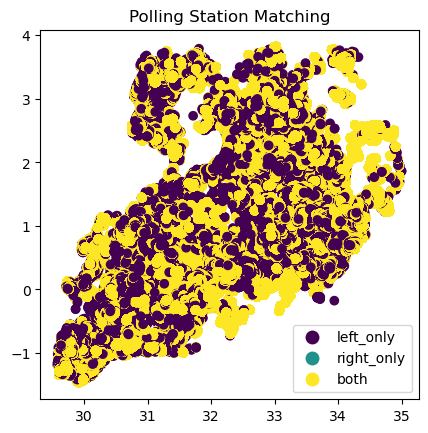

In [67]:
# Graphing voters unmatched with polling stations
ax = merged_df.plot(column = "_merge",
                    cmap = "viridis",
                    legend = True,
                    missing_kwds={'color': 'lightgrey'})
ax.set_title('Polling Station Matching')

## Quick Note on Stations

We seem to struggle most with matching polling stations in northern and eastern Uganda, which makes sense, given that this area is the most sparsely populated and likely the least documented. I am a bit confused about how to use Geopandas to create visualizations spatially joined with the districts map, given that I cannot group my data by district and polling station without running into issues with a mismatched number of levels. I am additionally struggling to ascertain how we can fix the merge of these datasets, given that we have more voters unsuccessfully merged than those successfully merged.